In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# __Simple Linear Regression__

- ##### Eğimi 2 ve kesişim katsayısı -5

X
 [9.81108165 7.16559263 3.83840667 2.07346723 2.17879288 9.50570591
 1.02494836 2.95127893 3.63394959 7.43533587 7.31916105 7.63963497
 3.56309096 7.91843328 8.46781876 3.30826462 9.8129242  4.84020219
 5.54785647 2.95717434 8.29301884 4.87485918 8.63001517 1.14583048
 8.92310797 9.03472781 4.40803965 8.4465569  0.83503383 4.14409629
 9.66960235 2.89989526 6.4773524  6.11711225 9.26285776 4.98653812
 8.71135133 5.59771023 0.48319908 7.4403295  7.67782806 5.52515155
 7.62955764 1.85359957 8.49390724 9.54159677 5.91592702 2.3450637
 2.81206058 2.93794674] 

y
 [13.86934533  7.86371967  2.09437379 -0.38990116  4.15921214 14.06127079
 -1.8869151  -0.33397473  3.19809284 10.70384101  9.63930129  8.42767297
  0.1165724  11.42579935 12.44024139  2.62873205 14.8385094   4.5972214
  5.27334209  1.76918012  9.93516903  4.03929638 13.91812875 -4.62615801
 13.44725933 14.02085421  4.23992617 11.0009663  -3.02995692  3.78223107
 15.43533991  0.97552148  7.57259211  5.75856939 11.97635597  3.61176

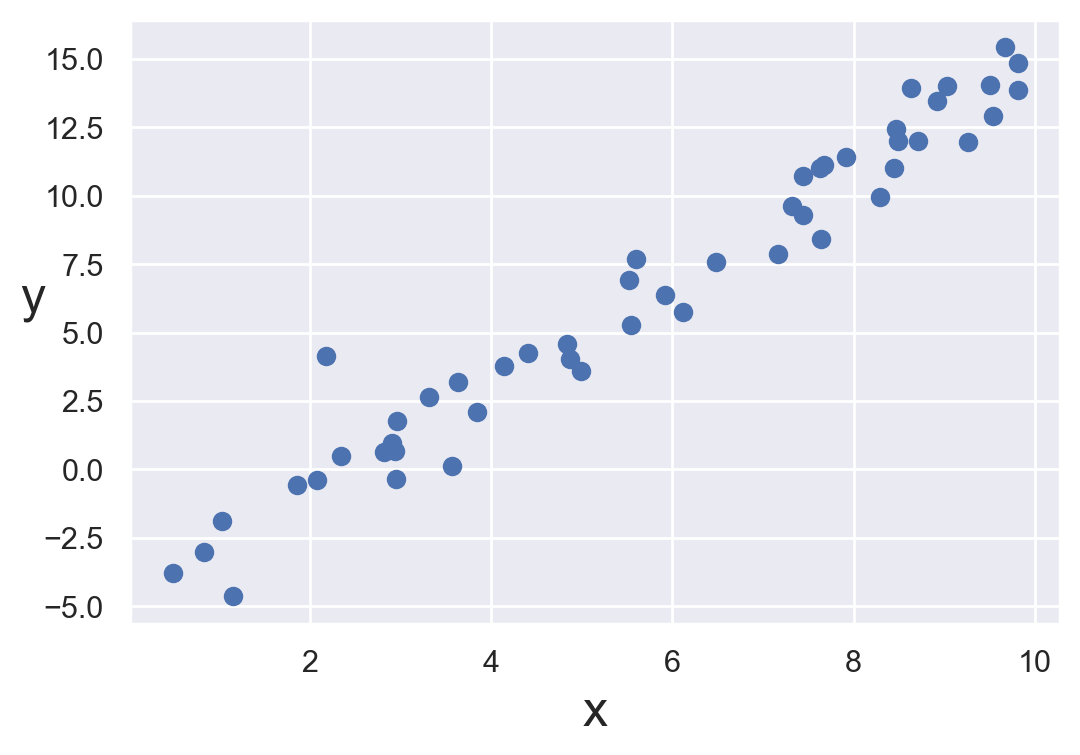

In [2]:
rng = np.random.RandomState()
x = 10 * rng.rand(50)

y = 2 * x - 5 + rng.randn(50)
# 2 değeri slop yani eğitimi verir.
# -5 değeri bias yani intercept değeri içinidir. 

plt.figure(dpi=200)
plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)

print('X\n', x, '\n')
print('y\n', y, '\n')

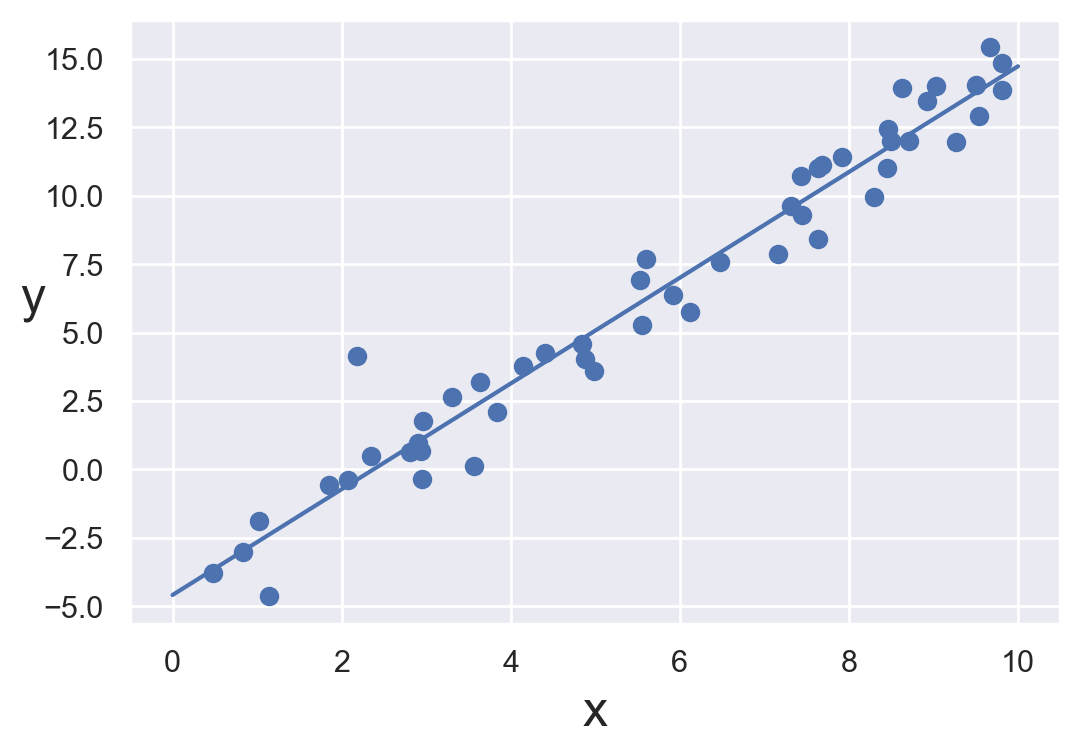

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

#intercept bias değerini aktif etmiş oluyoruz.
#dot production olduğu için modeli fit edebilmek adına newaxis kullanıyoruz.

model.fit(x[:, np.newaxis], y)
#nplinspace 0 ve 10 arasındaki değişkenlerde 1000 tane değer alır ve linear bir çizgi oluşturur.
#newaxis boyutu ayarlanıyor.

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.figure(dpi=200)
plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.plot(xfit, yfit);

- ##### Verilerin eğimi ve kesişimi modelin fit parametrelerinde bulunur

In [4]:
print("Model eğimi:    ", model.coef_[0])
#çizginin ve modelin eğimidir.
#eğim iki iken model 1.93 yakın gelmiştir. 
print("Model kesişimi:", model.intercept_)
#intercept bias değer -4 gelmiş.
#modelde bias değerini -5 vermiştik, gelen değer -4 ve yakındır.

Model eğimi:     1.9317081849572109
Model kesişimi: -4.587957178583904


# __Polynomial Regression__

[[-1.47331724]
 [-1.49620293]
 [ 1.8611279 ]
 [-2.85935607]
 [ 1.62903687]
 [-2.49570336]
 [ 2.6621576 ]
 [ 2.84117058]
 [-1.64141305]
 [-0.52267019]
 [-0.88027691]
 [-0.1704088 ]
 [ 1.49085121]
 [-0.28907945]
 [-2.21585782]
 [ 1.96181332]
 [ 2.20837606]
 [ 1.82569601]
 [-1.54219073]
 [ 2.52577003]
 [ 2.37880463]
 [-1.84057827]
 [-2.67508113]
 [-1.92898202]
 [ 0.32078705]
 [ 2.91688115]
 [-1.07054967]
 [ 2.18620555]
 [ 0.03745303]
 [ 0.66932691]
 [ 0.98299943]
 [ 1.00415675]
 [-1.95940354]
 [ 1.11493398]
 [ 1.47539954]
 [-1.24214646]
 [ 1.28229285]
 [-2.69508538]
 [-0.47213546]
 [ 0.0668388 ]
 [ 1.14575384]
 [-1.87356363]
 [ 0.60618163]
 [ 2.16108907]
 [-1.71278551]
 [ 1.80062   ]
 [ 2.22170751]
 [ 0.44073716]
 [ 1.60456052]
 [-1.33303694]
 [-0.7951712 ]
 [ 2.05639503]
 [ 2.12038096]
 [ 1.81071256]
 [-1.4975702 ]
 [-2.94140287]
 [-1.27015192]
 [-0.04824814]
 [-2.52239809]
 [ 2.84384415]
 [ 0.25697034]
 [-1.39689919]
 [ 2.25543554]
 [ 2.81647492]
 [-0.06248615]
 [-1.91560557]
 [ 2.20754

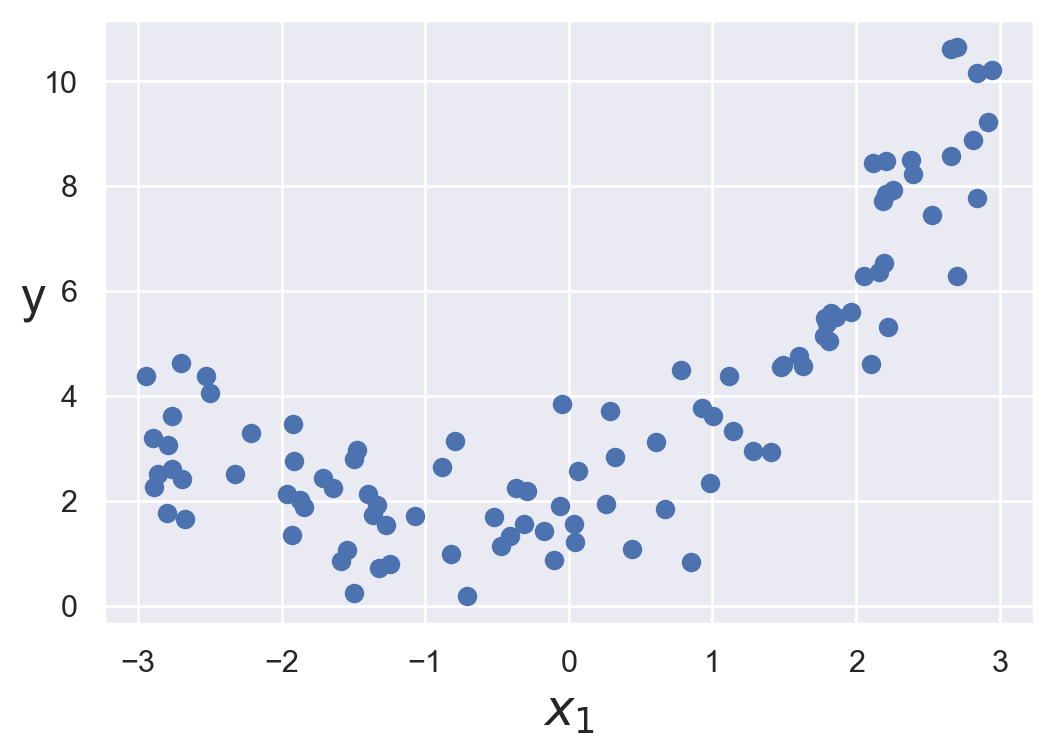

In [5]:
m = 100
# 100 tane dataset büyüklüğü vardır.

X = 6 * np.random.rand(m, 1) - 3
print(X)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure(dpi=200)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.scatter(X, y)

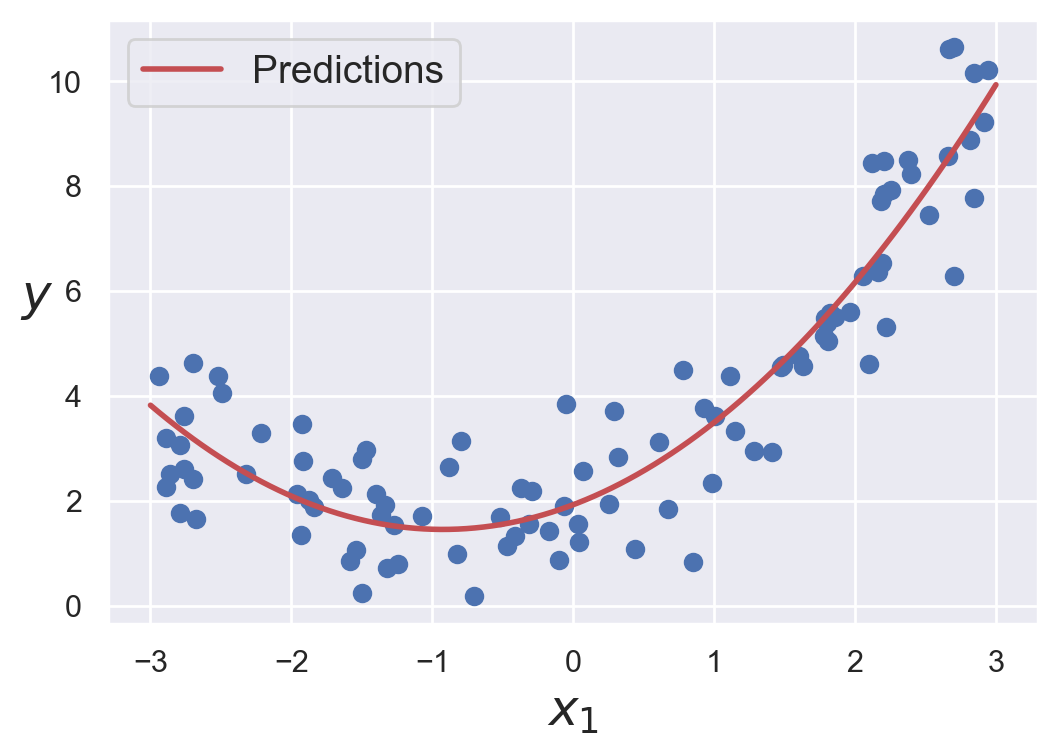

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#önce pipeline ile linear regression haline getirilmesi gerekir.
#linear için linespace kullanıyoruz.
#include bias false ile bias eklemiyoruz.
#degree ile x karenin ikisini belirtiyoruz. ikinci derece oluşu.

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression.fit(X, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_newbig = polynomial_regression.predict(X_new)
plt.figure(dpi=200)
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_new, y_newbig, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

# __Logistic Regression__

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris)
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
#liblinear : l2 metriği kullanılmaktadır. (l2 penalty)
#random değerini sürekli tutmak için genel bir magic numberdır 42.
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

[[0.98554411 0.01445589]
 [0.98543168 0.01456832]
 [0.98531838 0.01468162]
 ...
 [0.02618938 0.97381062]
 [0.02598963 0.97401037]
 [0.02579136 0.97420864]]


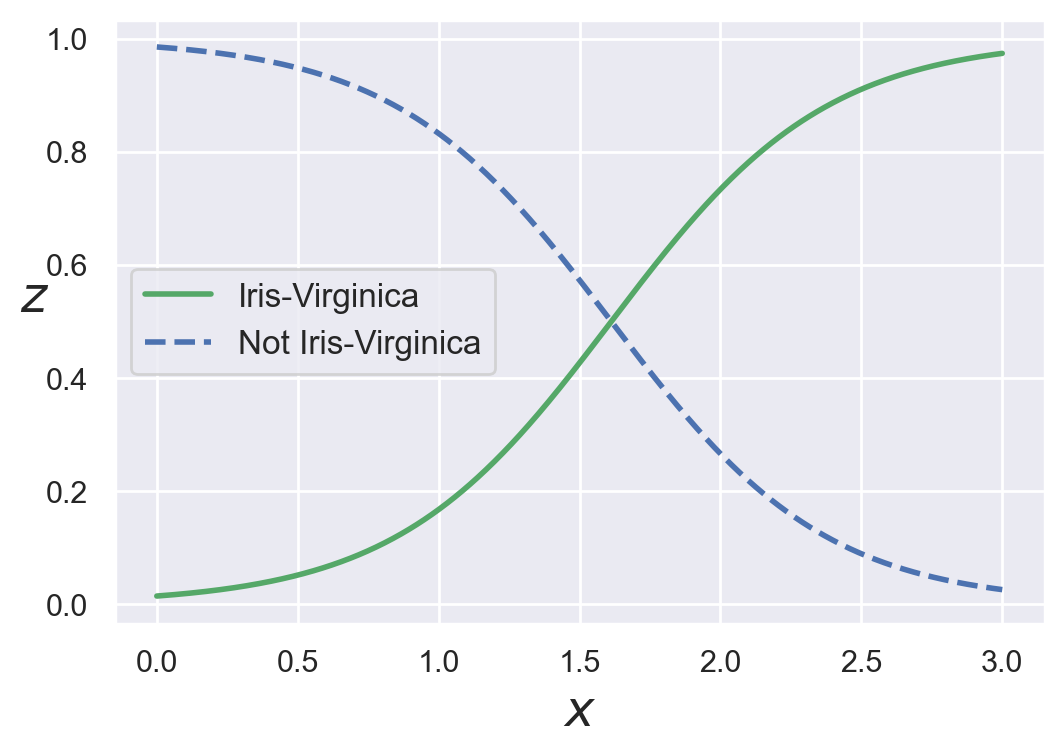

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
#y_probe probability değeri (olasılık değerleri). 

print(y_proba)
plt.figure(dpi=200)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$z$", rotation=0, fontsize=18)
plt.legend(loc="center left", fontsize=12)

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
# dec-bou : iki eğrinin 0.5 teki kesişimi. (karar sınırı)
decision_boundary

array([1.61561562])

# __k-Nearest Neighbor__

In [13]:
from sklearn import datasets

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine['target']

wine_data.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.860,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.040,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.020,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.060,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.010,3.55,1045.0,0


In [14]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# k değerini neye göre seçeriz : veri setine göre değişir. 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [17]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7407407407407407


# __Support Vector Machines__

### Classification

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 

iris = datasets.load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [19]:
X = iris.data 
y = iris.target
print(y)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
# linear : modelin evaluation değerlendirilmesi linear olarak seçiyoruz.
# kernel'de c değeri : regularization değeridir. 

svm_predictions = svm_model_linear.predict(X_test) 

In [22]:
svm_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [23]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

0.9736842105263158

### Regression

In [24]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [25]:
from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)
print(X, '\n')
print(y)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]] 

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [26]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred = regressor.predict([[6.5]])
y_pred

array([130001.55760156])

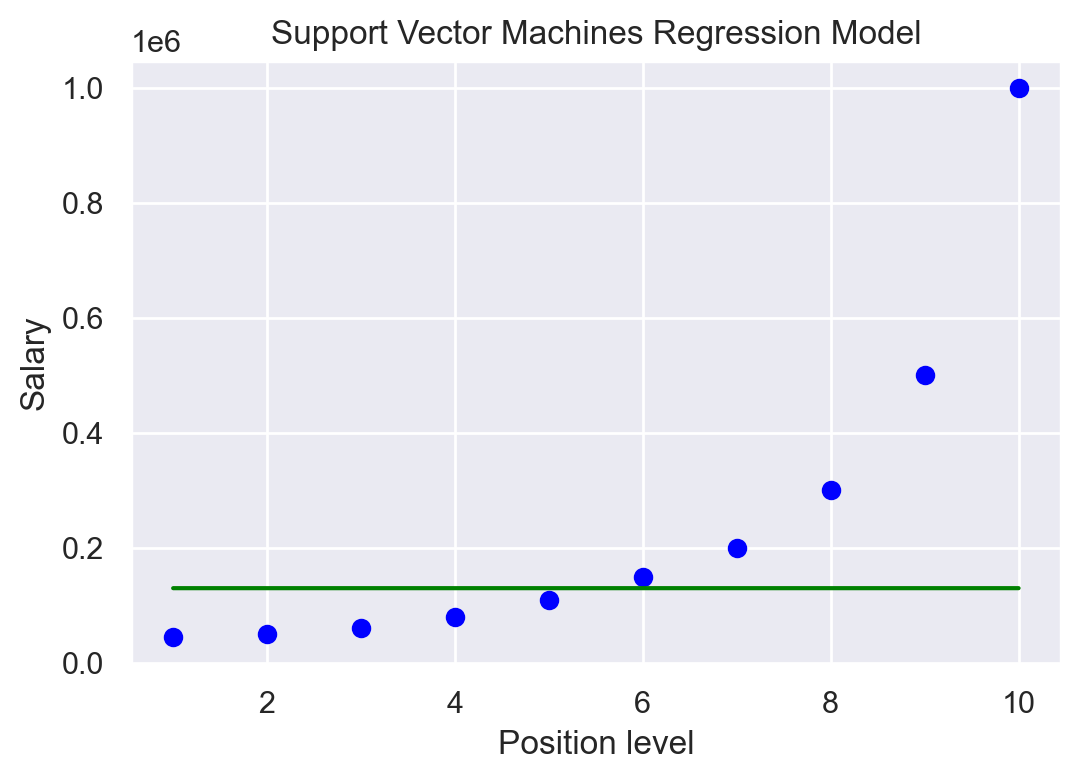

In [28]:
plt.figure(dpi=200)
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'green')
#green modelimizi gösterir.
plt.title('Support Vector Machines Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#standart scaler yapılmadığında; modelimiz linear bir modele dönüşüyor ve değerler yüksek çıkıyor.
#hiç bir şekilde değişiklik olmuyor. 

# __Decision Trees__

### Decision Tree Classifiers

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv")
pima.columns = col_names
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
clf = DecisionTreeClassifier()
#default kriteri ginidir.
#gini entropy'e oranla daha hizli oldugu icin default olarak kullanilmaktadir.

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


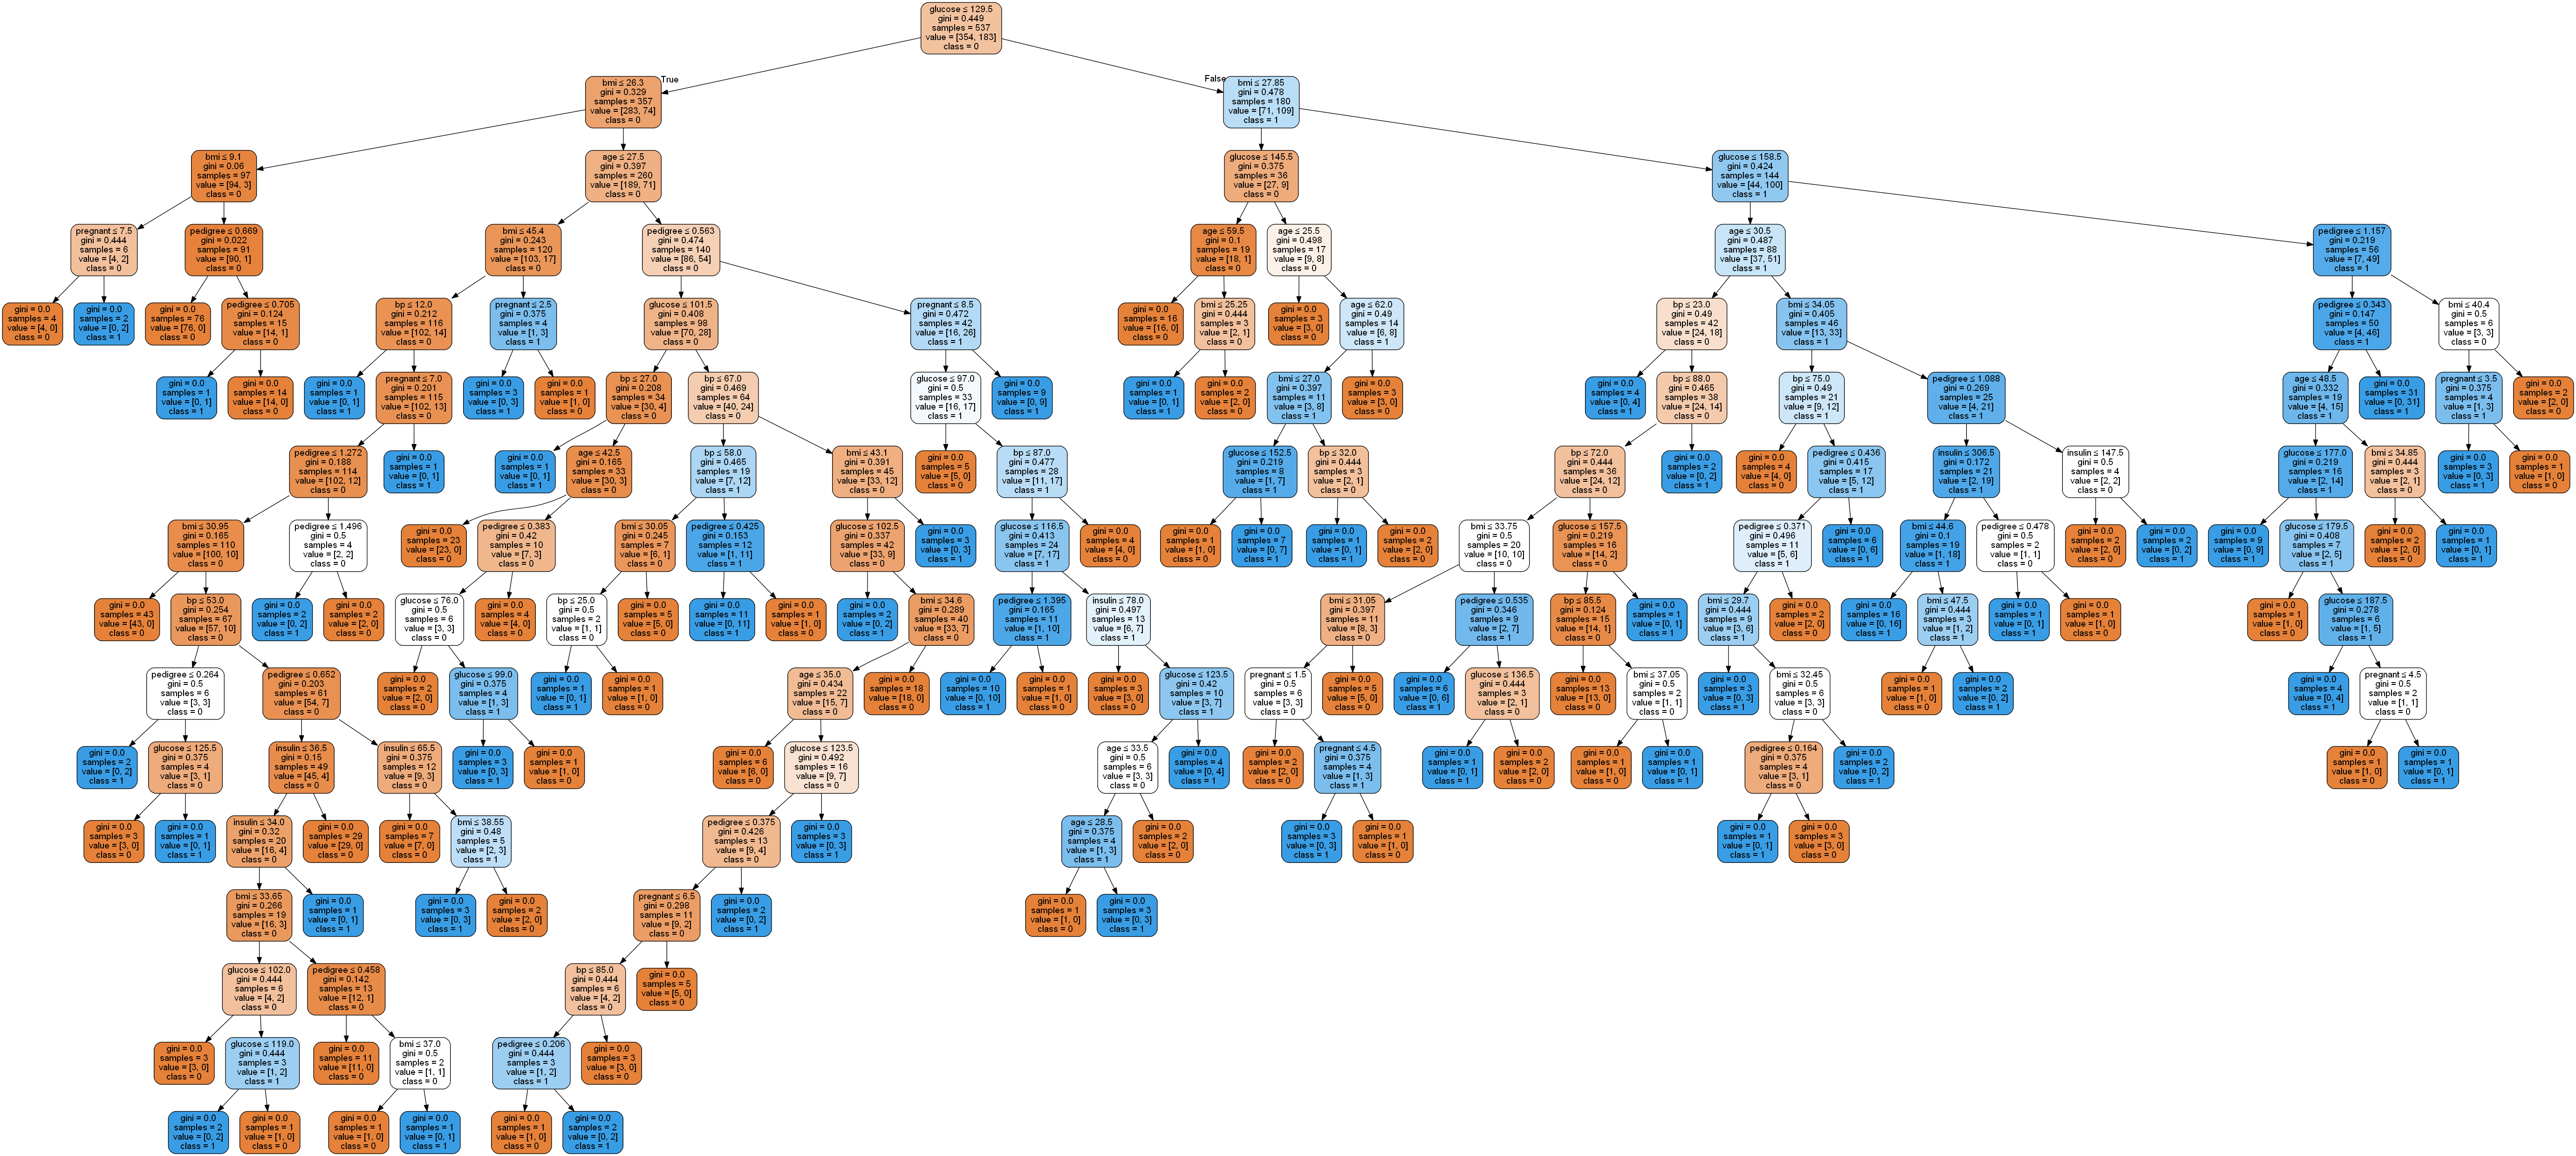

In [35]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_1.png')
Image(graph.create_png())

In [38]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#entropy olarak ayarlaniyor, max depth agacin derinlik sayisidir.

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


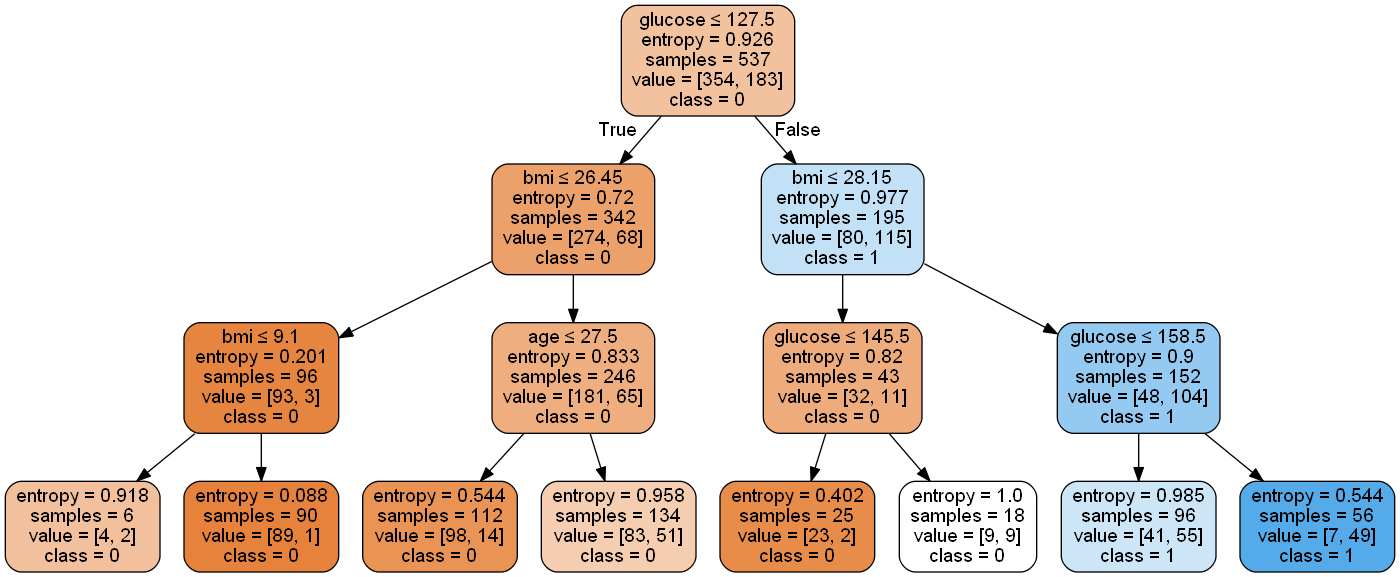

In [39]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_cols,class_names=['0','1']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_2.png')
Image(graph.create_png())

### Decision Tree Regressors

In [40]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

dataset

array([['Asset Flip', '100', '1000'],
       ['Text Based', '500', '3000'],
       ['Visual Novel', '1500', '5000'],
       ['2D Pixel Art', '3500', '8000'],
       ['2D Vector Art', '5000', '6500'],
       ['Strategy', '6000', '7000'],
       ['First Person Shooter', '8000', '15000'],
       ['Simulator', '9500', '20000'],
       ['Racing', '12000', '21000'],
       ['RPG', '14000', '25000'],
       ['Sandbox', '15500', '27000'],
       ['Open-World', '16500', '30000'],
       ['MMOFPS', '25000', '52000'],
       ['MMORPG', '30000', '80000']], dtype='<U20')

In [41]:
X = dataset[:,1:2].astype(int)
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [42]:
y = dataset[:,2].astype(int)
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [43]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [44]:
y_pred = regressor.predict([[3750]])

print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



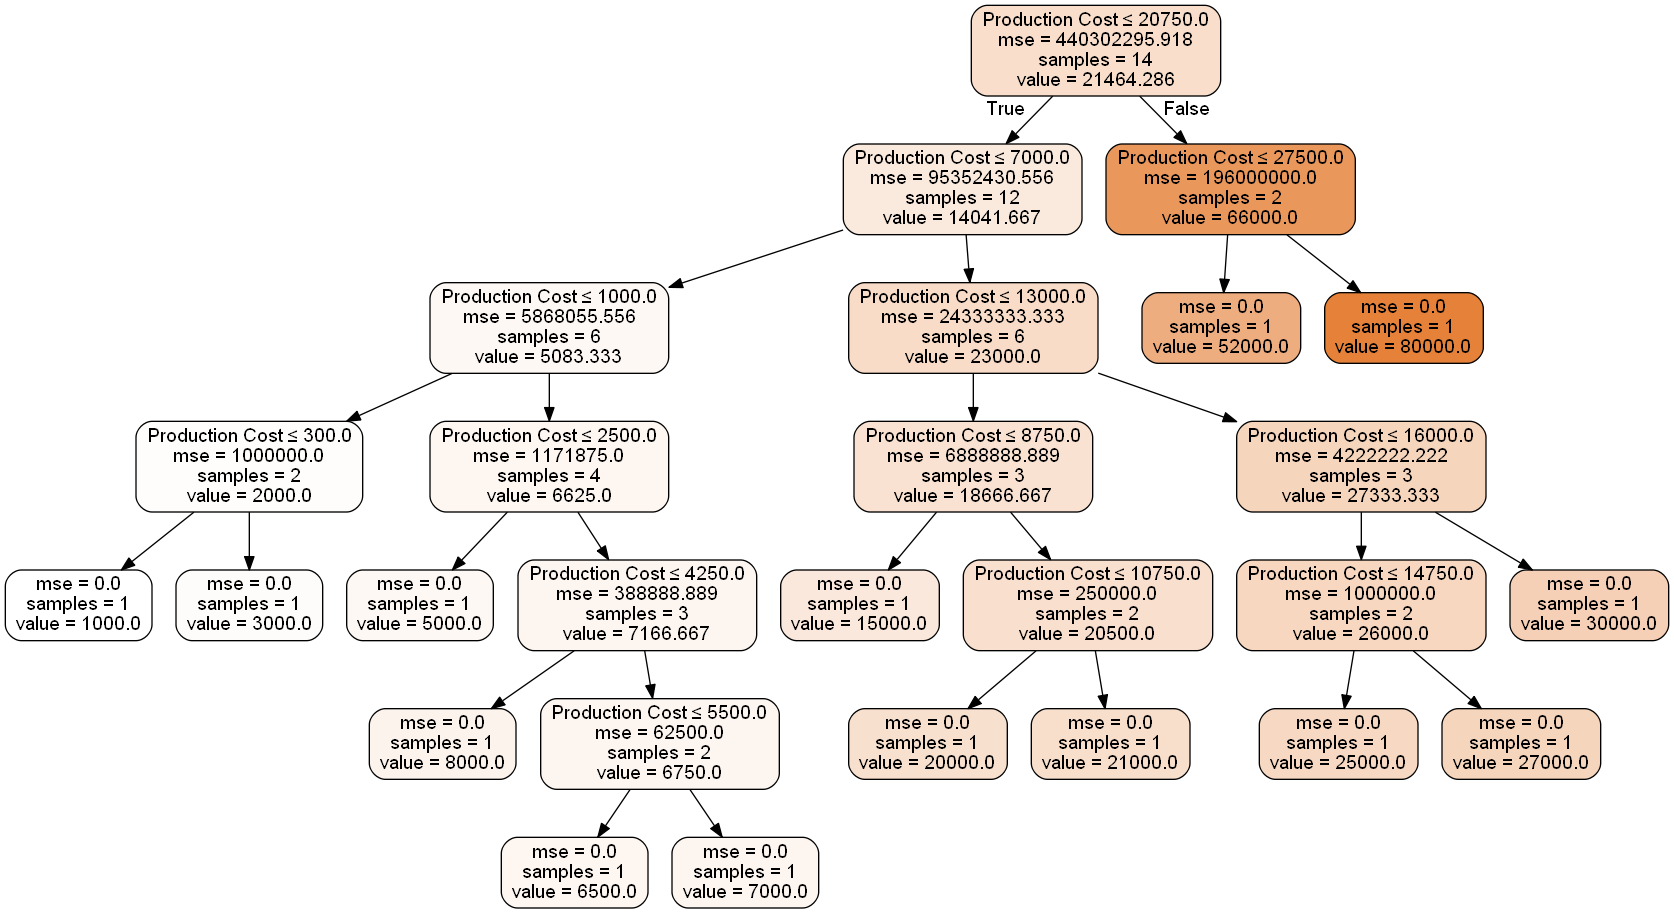

In [45]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = ['Production Cost']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('regression_tree.png')
Image(graph.create_png())

# __Ensemble Methods & Random Forest__

### Random Forest Classification

### Voting Classifiers

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

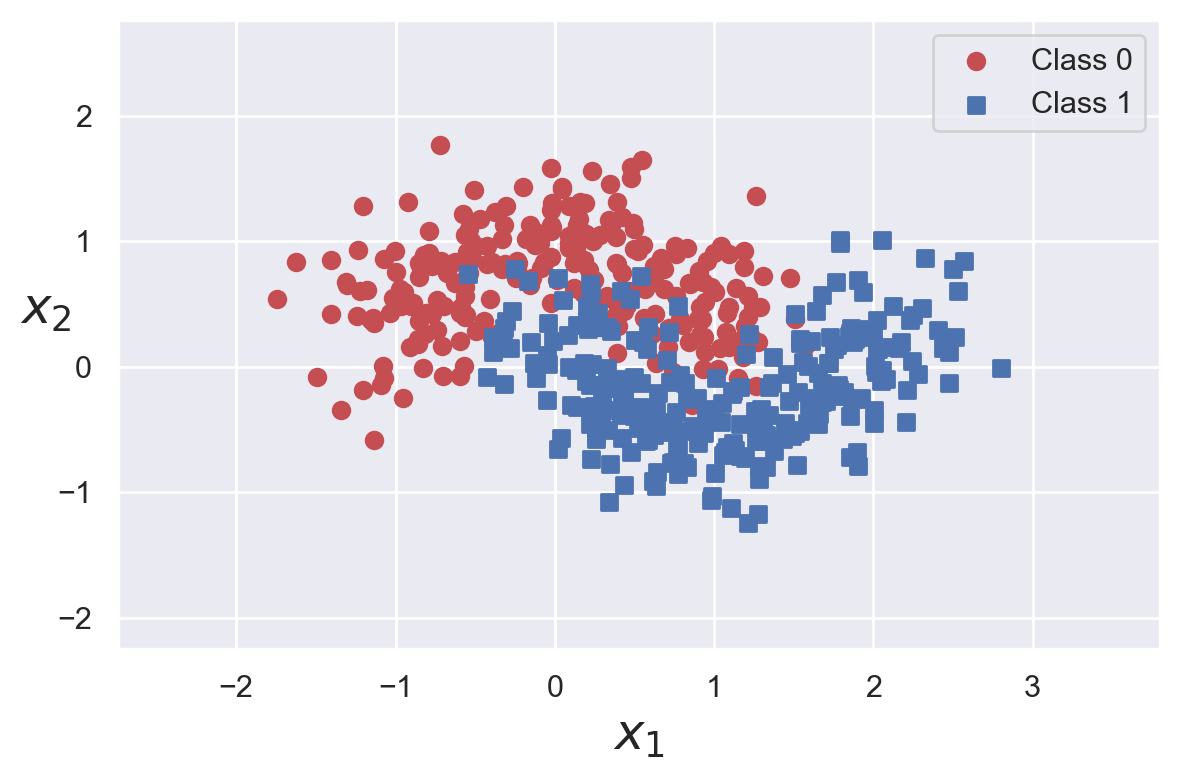

In [47]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', rotation=0, fontsize=18)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)
#bu üç sınıflandırıcıyı birleştirip çalıştırıyor.
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [49]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [50]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


### Bagging and Pasting

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [53]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


### __Random Forests__

In [54]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

#feature importance : aldigimiz feature'in model uzerine etkisi

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


In [55]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

### Random Forest Regression

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [58]:
data_df = pd.read_csv('Random-Forest-Regression-Data.csv')
data_df.head()

,x,y
0,59.000000,152.553428
1,88.696970,158.420441
2,87.443939,154.189316
3,110.090909,161.136969
4,126.787879,158.819572


In [59]:
x = data_df.x.values.reshape(-1, 1)
y = data_df.y.values.reshape(-1, 1)
print('x\n', x, '\n')
print('y\n', y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

x
 [[  59.        ]
 [  88.6969697 ]
 [  87.44393939]
 [ 110.09090909]
 [ 126.78787879]
 [ 148.48484848]
 [ 168.18181818]
 [ 187.87878788]
 [ 207.57575758]
 [ 227.27272727]
 [ 246.96969697]
 [ 266.66666667]
 [ 286.36363636]
 [ 306.06060606]
 [ 325.75757576]
 [ 345.45454545]
 [ 365.15151515]
 [ 384.84848485]
 [ 404.54545455]
 [ 424.24242424]
 [ 443.93939394]
 [ 463.63636364]
 [ 483.33333333]
 [ 503.03030303]
 [ 522.72727273]
 [ 542.42424242]
 [ 562.12121212]
 [ 581.81818182]
 [ 601.51515152]
 [ 621.21212121]
 [ 640.90909091]
 [ 660.60606061]
 [ 680.3030303 ]
 [ 700.        ]
 [ 719.6969697 ]
 [ 739.39393939]
 [ 759.09090909]
 [ 778.78787879]
 [ 798.48484848]
 [ 818.18181818]
 [ 837.87878788]
 [ 857.57575758]
 [ 877.27272727]
 [ 896.96969697]
 [ 916.66666667]
 [ 936.36363636]
 [ 956.06060606]
 [ 975.75757576]
 [ 995.45454545]
 [1015.15151515]
 [1034.84848485]
 [1054.54545455]
 [1074.24242424]
 [1093.93939394]
 [1113.63636364]
 [1133.33333333]
 [1153.03030303]
 [1172.72727273]
 [1192.4242

In [60]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
y_pred = rf_reg.predict(x_test)
y_pred

array([173.43612059, 167.33214244, 172.30839656, 164.58496073,
       164.42185737, 160.89049503, 159.12853607, 169.74215094,
       157.49584782, 155.88176632, 159.86514698, 162.16109318,
       167.79485369, 163.18924059, 175.06786752, 159.35754499,
       171.41354186, 171.73792638, 155.98192366, 163.18924059,
       167.10721239, 174.20939956, 161.77237665, 164.80829323,
       171.26877716, 157.4688331 , 164.20049059, 173.05370728,
       157.1368088 , 172.42964624])

In [62]:
print("Test Accuracy = ", rf_reg.score(x_test, y_test))

Test Accuracy =  0.8649221120148627
